<a href="https://colab.research.google.com/github/meghanjukl-meg/ICTK_Assignment/blob/main/Sess_24_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales = pd.read_csv('/content/sales.csv')
sales

,order_id,region,product,units_sold,unit_price,discount,customer_type,order_month
0,101,North,Phone,5,15000,0.10,New,Jan
1,102,South,Laptop,2,55000,0.05,Returning,Jan
2,103,East,Tablet,8,22000,0.15,New,Feb
3,104,West,Phone,3,15000,0.00,Returning,Feb
4,105,North,Laptop,1,55000,0.10,New,Mar
5,106,South,Tablet,6,22000,0.20,Returning,Mar
6,107,East,Phone,4,15000,0.05,New,Apr
7,108,West,Laptop,2,55000,0.00,Returning,Apr
8,109,North,Tablet,7,22000,0.15,New,May
9,110,South,Phone,5,15000,0.10,Returning,May


1.Identify continuous, discrete, and categorical columns in the dataset.

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10 non-null     int64  
 1   region         10 non-null     object 
 2   product        10 non-null     object 
 3   units_sold     10 non-null     int64  
 4   unit_price     10 non-null     int64  
 5   discount       10 non-null     float64
 6   customer_type  10 non-null     object 
 7   order_month    10 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 772.0+ bytes


continuous- discount

discrete- orderid ,units_sold,units_price

categorical-customer_type,product,region,order_month

2.Visualize the distribution of units_sold.

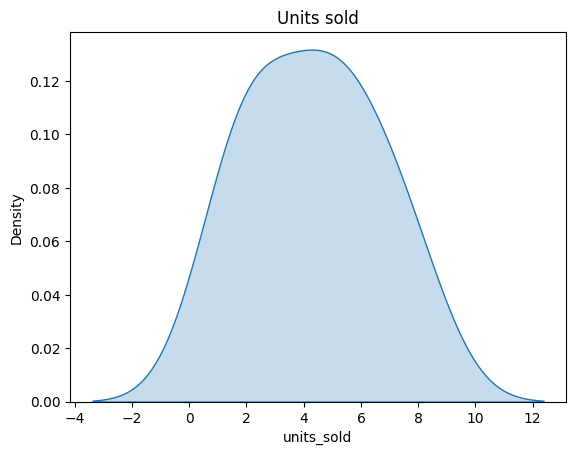

In [ ]:
sns.kdeplot(sales['units_sold'],fill = True)
plt.title("Units sold")
plt.show()

3.Show region-wise count of orders.

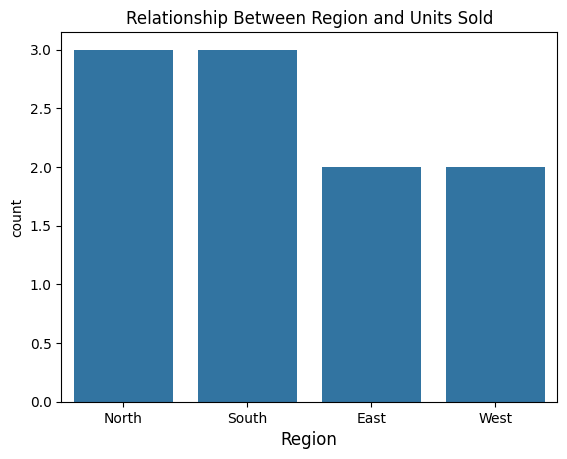

In [ ]:
sns.countplot(x= 'region',data =sales)
plt.title("Relationship Between Region and Units Sold")
plt.xlabel('Region', fontsize=12)

plt.show()

4.Compare sales of different products using a suitable plot.

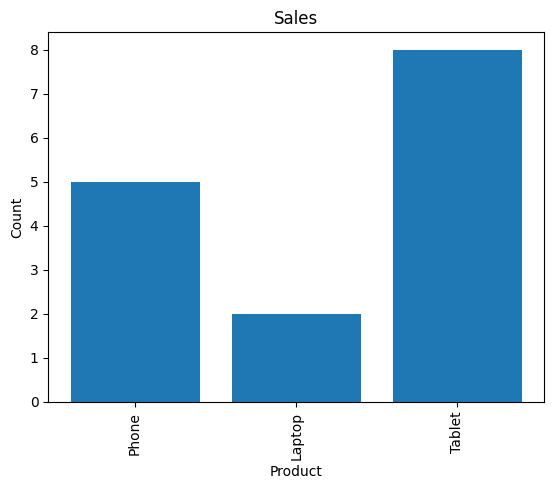

In [ ]:
plt.bar(sales['product'],sales['units_sold'])
plt.xticks(rotation=90)
plt.title('Sales')#Title for the graph
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

5.Visualize the relationship between discount and units_sold.

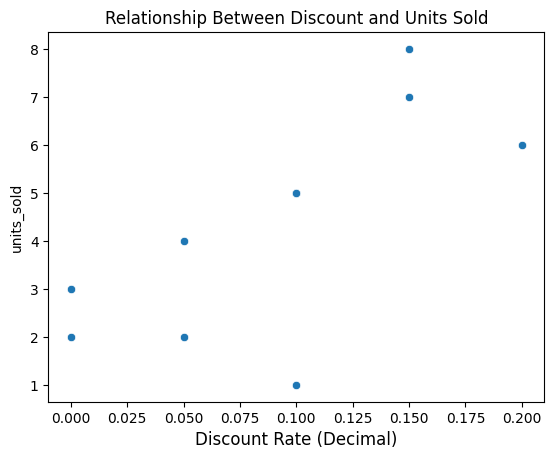

In [ ]:
sns.scatterplot(data =sales,x= 'discount', y= 'units_sold')
plt.title("Relationship Between Discount and Units Sold")
plt.xlabel('Discount Rate (Decimal)', fontsize=12)

plt.show()

6.Identify which product generates higher revenue visually

In [ ]:
#'Net Revenue' for each order
sales['net_revenue'] = (sales['units_sold'] * sales['unit_price']) * (1 - sales['discount'])
sales[['net_revenue','product']]

,net_revenue,product
0,67500.0,Phone
1,104500.0,Laptop
2,149600.0,Tablet
3,45000.0,Phone
4,49500.0,Laptop
5,105600.0,Tablet
6,57000.0,Phone
7,110000.0,Laptop
8,130900.0,Tablet
9,67500.0,Phone


In [ ]:
product_revenue = sales.groupby('product')['net_revenue'].sum().sort_values(ascending=False)
product_revenue

,net_revenue
product,
Tablet,386100.0
Laptop,264000.0
Phone,237000.0


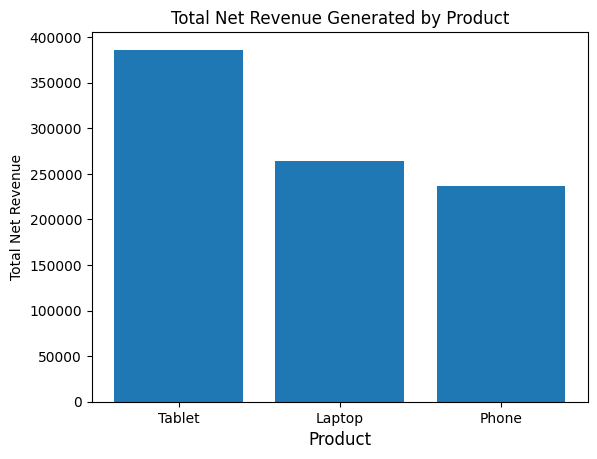

In [ ]:
plt.bar(product_revenue.index, product_revenue.values)
plt.title("Total Net Revenue Generated by Product")
plt.xlabel('Product', fontsize=12)
plt.ylabel("Total Net Revenue")
plt.show()

7.Compare spending patterns of new vs returning custome

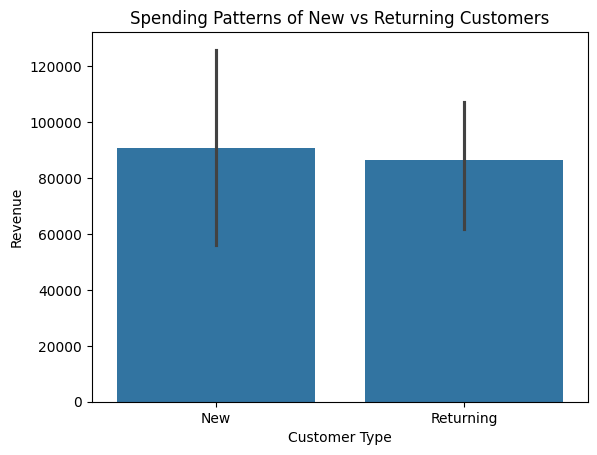

In [ ]:
sns.barplot(data= sales,x='customer_type',y='net_revenue',estimator= np.mean)
plt.title('Spending Patterns of New vs Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
plt.show()

8.create a plot to show monthly sales trend.

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May']

In [ ]:
sales['order_month'] = pd.Categorical(sales['order_month'], categories=month_order, ordered=True)# observed=False to keep all months in the index even if one had zero sales

In [ ]:
monthly_revenue = sales.groupby('order_month',observed=False)['net_revenue'].sum()
monthly_revenue

,net_revenue
order_month,
Jan,172000.0
Feb,194600.0
Mar,155100.0
Apr,167000.0
May,198400.0


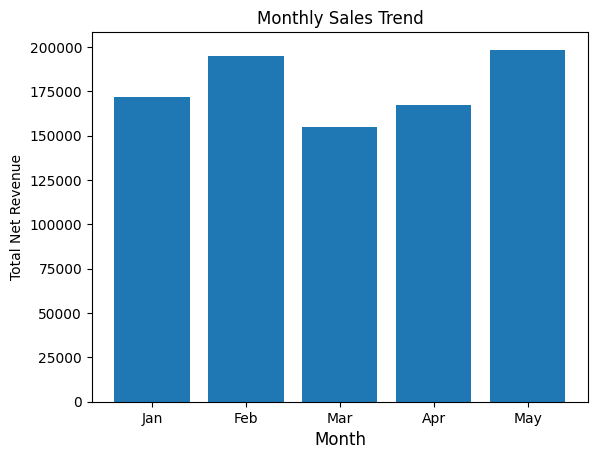

In [ ]:
plt.bar(monthly_revenue.index, monthly_revenue.values)
plt.title("Monthly Sales Trend")
plt.xlabel('Month', fontsize=12)
plt.ylabel("Total Net Revenue")
plt.show()

9.Identify if any region shows unusually high or low sales.

In [ ]:
regional_sales = sales.groupby('region')['net_revenue'].sum().sort_values()
regional_sales

,net_revenue
region,
West,155000.0
East,206600.0
North,247900.0
South,277600.0


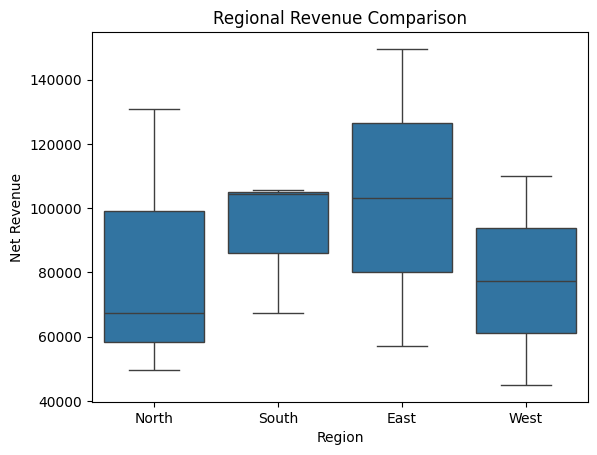

In [ ]:
sns.boxplot(x='region',y='net_revenue',data=sales)
plt.title('Regional Revenue Comparison')
plt.xlabel("Region")
plt.ylabel("Net Revenue")
plt.show()



10.Based on visualizations, write 2 business insights.

1.The Tablet category is now the primary revenue driver

2.A comparison of sales across different regions reveals that West region generated the lowest total revenue while the North region led